In [33]:
#!pip install faker
#!pip install git+https://github.com/TimeSynth/TimeSynth.git
#!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta as td

<Axes: >

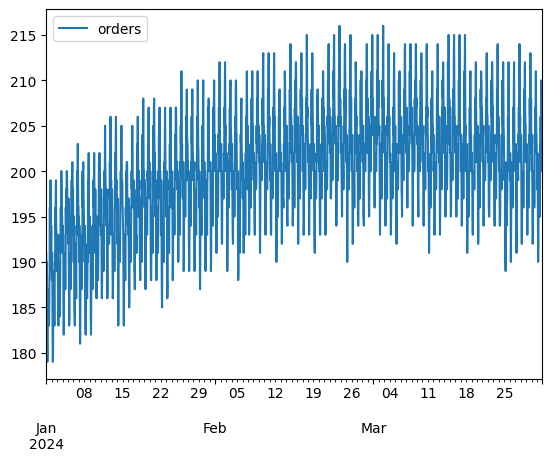

In [738]:
date_range = pd.date_range(start=dt(2024, 1, 1), end=dt(2024, 3, 31, 23), freq='H')
hourly_mean = 200


trend = np.polyval([-0.0001, 0.3, 0], np.arange(len(date_range)))
trend = ((trend - trend.mean()) / trend.std()) * 4

weekly_profile = np.cumsum(np.random.normal(scale=3, size=7))
weekly_profile = (weekly_profile - weekly_profile.mean()) / weekly_profile.std()
weekly_season = np.tile(np.repeat(weekly_profile, 24), int(len(date_range)/7/24))

daily_profile = np.cumsum(np.random.normal(scale=1, size=24))
daily_profile = ((daily_profile - daily_profile.mean()) /  daily_profile.std()) * 5
daily_season = np.tile(daily_profile, int(len(date_range)/24))

noise = np.random.normal(scale=1, size=len(date_range))

orders = (trend + weekly_season + daily_season + noise).astype(int) + hourly_mean
df = pd.DataFrame({'orders': orders}, index=date_range)

df.plot()

In [735]:
df

,orders
2024-01-01 00:00:00,195
2024-01-01 01:00:00,197
2024-01-01 02:00:00,200
2024-01-01 03:00:00,197
2024-01-01 04:00:00,194
...,...
2024-03-31 19:00:00,200
2024-03-31 20:00:00,203
2024-03-31 21:00:00,203
2024-03-31 22:00:00,203


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

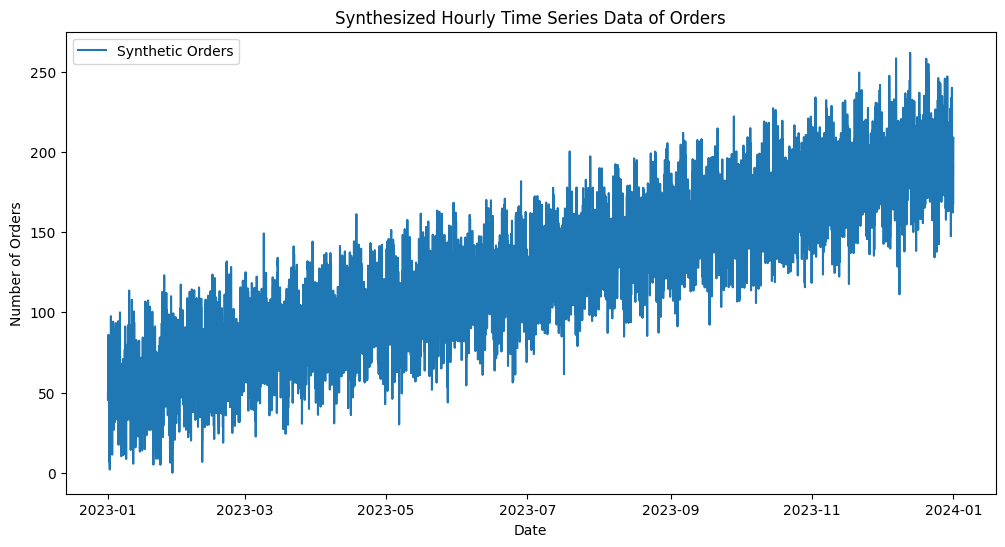

In [35]:
# Set random seed for reproducibility
np.random.seed(42)

# Function to generate synthetic time series data
def generate_synthetic_data(start_date, end_date, freq='H'):
    date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
    
    # Yearly trend
    yearly_trend = np.linspace(50, 200, len(date_rng))
    
    # Daily seasonal pattern
    daily_seasonal = 20 * np.sin(2 * np.pi * date_rng.hour / 24)
    
    # Weekly seasonal pattern
    weekly_seasonal = 10 * np.sin(2 * np.pi * date_rng.dayofweek / 7)
    
    # Random noise
    noise = np.random.normal(loc=0, scale=15, size=len(date_rng))
    
    # Synthesize orders with trends and patterns
    orders = yearly_trend + daily_seasonal + weekly_seasonal + noise
    
    # Ensure non-negative values
    orders = np.maximum(orders, 0)
    
    # Create DataFrame
    data = {'date': date_rng, 'orders': orders}
    df = pd.DataFrame(data)
    
    return df

# Generate synthetic data for one year
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31, 23, 59)
synthetic_data = generate_synthetic_data(start_date, end_date)

# Plot the synthetic data
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data['date'], synthetic_data['orders'], label='Synthetic Orders')
plt.title('Synthesized Hourly Time Series Data of Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()


In [37]:
from numpy.polynomial import Polynomial

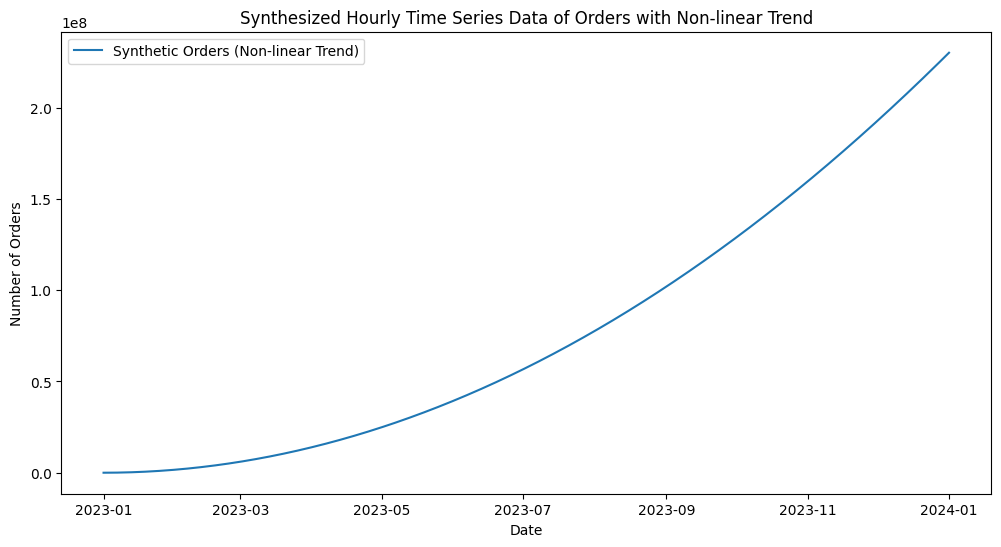

In [44]:
# Set random seed for reproducibility
np.random.seed(42)

# Function to generate synthetic time series data with a non-linear trend
def generate_synthetic_data(start_date, end_date, freq='H'):
    date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
    
    # Non-linear trend (quadratic function)
    trend_coefficients = [3, 2, 1]  # Adjust coefficients as needed
    non_linear_trend = np.polyval(trend_coefficients, np.arange(len(date_rng)))
    
    # Daily seasonal pattern
    daily_seasonal = 20 * np.sin(2 * np.pi * date_rng.hour / 24)
    
    # Weekly seasonal pattern
    weekly_seasonal = 10 * np.sin(2 * np.pi * date_rng.dayofweek / 7)
    
    # Random noise
    noise = np.random.normal(loc=0, scale=15, size=len(date_rng))
    
    # Synthesize orders with non-linear trend and patterns
    orders = non_linear_trend + daily_seasonal + weekly_seasonal + noise
    
    # Ensure non-negative values
    orders = np.maximum(orders, 0)
    
    # Create DataFrame
    data = {'date': date_rng, 'orders': orders}
    df = pd.DataFrame(data)
    
    return df

# Generate synthetic data for one year with a non-linear trend
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31, 23, 59)
synthetic_data_nonlinear_trend = generate_synthetic_data(start_date, end_date)

# Plot the synthetic data with a non-linear trend
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data_nonlinear_trend['date'], synthetic_data_nonlinear_trend['orders'], label='Synthetic Orders (Non-linear Trend)')
plt.title('Synthesized Hourly Time Series Data of Orders with Non-linear Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()
